<a href="https://colab.research.google.com/github/Ash100/DaS/blob/main/Plot_your_data_on_Plotnine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Plotting with Plotnine
This notebook is compiled by **Dr. Ashfaq Ahmad**. It intends the creation of biplots figures or simple plots (Line and Histograms). I particularly test them on RMSD.dat and RoG obtained in Molecular dynamics simulations files. How to use this notebook? Please watch a video tutorial "Plotline Plots via Jupyter Notebook" on https://www.youtube.com/@Bioinformaticsinsights

Best Regards,


In [ ]:
#Install Plotnine
!pip install pandas plotnine

In [2]:
import warnings
warnings.filterwarnings('ignore')


**Important**. Incase you want to load data from Google Drive. Incase of a direct upload, you do not need to import Google Drive. Therefore, do not run the below cell.

In [ ]:
#Import google modules:
from google.colab import drive
drive.mount('/content/drive')

##RMSD / RMSF Data or Line Plot
You are allowed to increase or decrease the inline options as per your needs. The inline options are for three files, if you have more than three, you need to increase otherwise disable one line if two.

In [7]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline
rmsf1 = pd.read_csv('/content/132056570_rmsd_ca.csv', encoding='latin1').dropna()
rmsf2 = pd.read_csv('/content/204648_rmsd_ca.csv', encoding='latin1').dropna()
rmsf3 = pd.read_csv('/content/44233641_rmsd_ca.csv', encoding='latin1').dropna()
rmsf4 = pd.read_csv('/content/44289877_rmsd_ca.csv', encoding='latin1').dropna()
rmsf5 = pd.read_csv('/content/53472683_rmsd_ca.csv', encoding='latin1').dropna()
rmsf6 = pd.read_csv('/content/83288403_rmsd_ca.csv', encoding='latin1').dropna()

In [20]:
# Add a 'Group' column to each DataFrame to differentiate them
rmsf1['Complex'] = '132056570'
rmsf2['Complex'] = '204648'
rmsf3['Complex'] = '44233641'
rmsf4['Complex'] = '44289877'
rmsf5['Complex'] = '53472683'
rmsf6['Complex'] = '83288403'

In [21]:
# Define custom colors for each receptor
custom_colors = {'132056570': 'Violet', '204648': 'Indigo', '44233641': 'Blue', '44289877': 'Green', '53472683': 'Yellow', '83288403': 'Orange'}

In [22]:
# Concatenate the three DataFrames into one
combined_data = pd.concat([rmsf1, rmsf2, rmsf3, rmsf4, rmsf5, rmsf6])

In [11]:
print(combined_data.columns)

Index(['Time (ps)', 'RMSD (Å)', 'Receptor'], dtype='object')


To plot your data, please run the below cell. Remember you need to edit the X and Y label for your plot.

In [23]:
#Generate horitontal line graph for RMSD data
p = ggplot(combined_data, aes(x='Time (ps)', y='RMSD (Å)', color='Complex')) + geom_line(size=1.0) + scale_color_manual(values=custom_colors) + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank()) + xlim(0, combined_data['Time (ps)'].max() + 10)

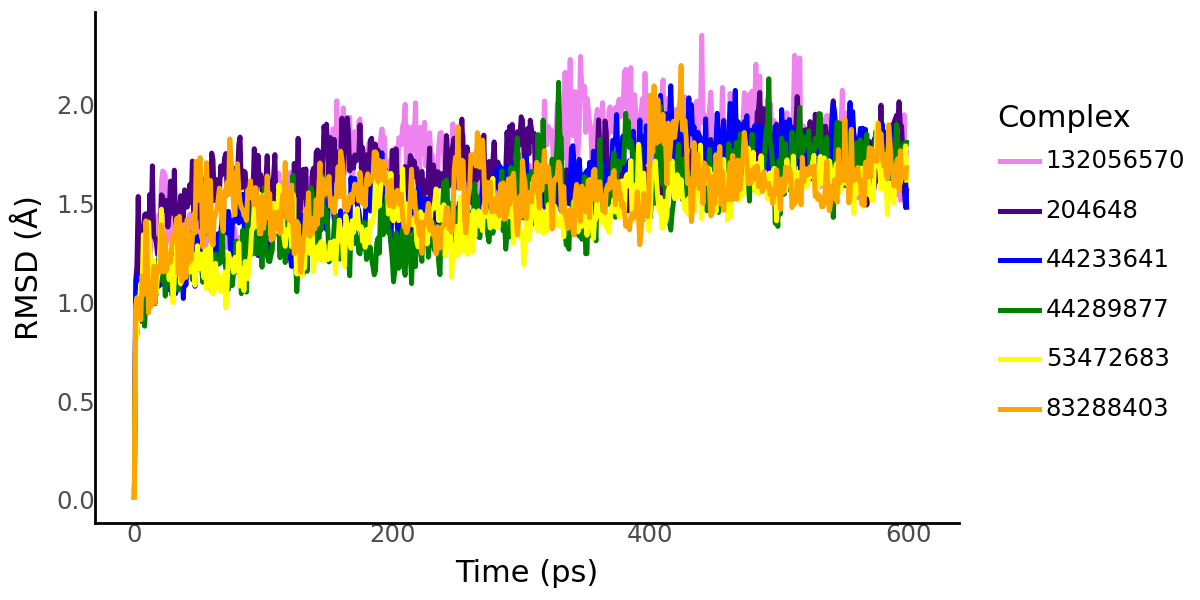

In [25]:
display(p)

In [26]:
#Save your plot
p.save(filename='RMSD.png', height=3, width=6, units='in', dpi=600)

Your Plot is already generated. Do not read the below cell. I have tweak some options there

In [ ]:
#To generate single RMSF plot, use this section
p = ggplot(combined_data, aes(x='Residues', y='RMSF (A)')) + geom_line(size=1.5, color='Receptor') + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank()) + xlim(0, combined_data['Residues'].max() + 10)

In [ ]:
 #To generate byplot from RMSF data
 p = ggplot(combined_data, aes(x='Residues', y='RMSF (A)', color='Receptor')) + geom_line(size=1.5) + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank()) + xlim(0, combined_data['Residues'].max() + 10)

In [ ]:
display(p)


In [ ]:
p.save(filename='RMSF.png', height=3, width=6, units='in', dpi=600)

##**2. Now we will plot Histogram Data**
In this case I will use the Radius of Gyration file from the simulations.

In case you only want to use this section, just a reminder please run the installation Cell (the first one), and load your data.

In [3]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline
hist1 = pd.read_csv('/content/132056570_radius_gyration.csv').dropna()
hist2 = pd.read_csv('/content/204648_radius_gyration.csv').dropna()
hist3 = pd.read_csv('/content/44233641_radius_gyration.csv').dropna()
hist4 = pd.read_csv('/content/44289877_radius_gyration.csv').dropna()
hist5 = pd.read_csv('/content/53472683_radius_gyration.csv').dropna()
hist6 = pd.read_csv('/content/83288403_radius_gyration.csv').dropna()

In [4]:
# Add a 'Group' column to each DataFrame to differentiate them
hist1['Complex'] = '132056570'
hist2['Complex'] = '204648'
hist3['Complex'] = '44233641'
hist4['Complex'] = '44289877'
hist5['Complex'] = '53472683'
hist6['Complex'] = '83288403'

In [5]:
# Define custom colors for each receptor
custom_colors = {'132056570': 'Violet', '204648': 'Indigo', '44233641': 'Blue', '44289877': 'Green', '53472683': 'Yellow', '83288403': 'Orange'}

In [6]:
# Concatenate the three DataFrames into one
combined_data = pd.concat([hist1, hist2, hist3, hist4, hist5, hist6])

In [15]:
#To Generate density plots froom the RoG or any other data.
p = ggplot(combined_data, aes(x='RoG', fill='Complex')) + geom_density(alpha=0.7, bw=0.7) + scale_fill_manual(values=custom_colors) + theme_minimal() + theme(figure_size=(6, 3), panel_background=element_rect(fill='white'), panel_grid_major=element_blank(), panel_grid_minor=element_blank(), axis_line=element_line(color='black'), panel_border=element_blank(), axis_text=element_text(color='black'), axis_title=element_text(color='black')) + xlim(18, combined_data['RoG'].max() + 2)

In [ ]:
display(p)

In [ ]:
p = ggplot(combined_data, aes(x='RoG', fill='Complex')) + \
    geom_density(alpha=0.7, bw=0.7) + \
    scale_fill_manual(values=custom_colors) + \
    facet_wrap('~Complex', scales='free_y') + \
    theme_minimal() + \
    theme(
        figure_size=(6, 3),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank(),
        axis_text=element_text(color='black'),
        axis_title=element_text(color='black')
    ) + \
    xlim(18, combined_data['RoG'].max() + 2)

display(p)


In [ ]:
p = ggplot(combined_data, aes(x='RoG', fill='Complex')) + \
    geom_density(alpha=0.7, bw=0.7, position='stack') + \
    scale_fill_manual(values=custom_colors) + \
    theme_minimal() + \
    theme(
        figure_size=(6, 3),
        panel_background=element_rect(fill='white'),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        axis_line=element_line(color='black'),
        panel_border=element_blank(),
        axis_text=element_text(color='black'),
        axis_title=element_text(color='black')
    ) + \
    xlim(18, combined_data['RoG'].max() + 2)
display(p)

In [22]:
p.save(filename = 'RoG.png', height=3, width=8, units = 'in', dpi=600)

**Congratulation!**

You have plot your data and save it with high resolution (600 dpi). You can download your data from the file menu located on the left side.